<a href="https://colab.research.google.com/github/tomobooon/ObjectRecognition/blob/main/tensorflow1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#ディープラーニングによる物体検出
https://note.com/navitime_tech/n/nae344375d0c9


In [11]:
%cd ./drive/MyDrive/
!pwd

category = {1:"person",2:"bicycle",3:"car",4:"motorcycle",5:"airplane",6:"bus",7:"train",8:"truck",9:"boat",10:"trafficlight",11:"firehydrant",13:"stopsign",14:"parkingmeter",15:"bench",16:"bird",17:"cat",18:"dog",19:"horse",20:"sheep",21:"cow",22:"elephant",23:"bear",24:"zebra",25:"giraffe",27:"backpack",28:"umbrella",31:"handbag",32:"tie",33:"suitcase",34:"frisbee",35:"skis",36:"snowboard",37:"sportsball",38:"kite",39:"baseballbat",40:"baseballglove",41:"skateboard",42:"surfboard",43:"tennisracket",44:"bottle",46:"wineglass",47:"cup",48:"fork",49:"knife",50:"spoon",51:"bowl",52:"banana",53:"apple",54:"sandwich",55:"orange",56:"broccoli",57:"carrot",58:"hotdog",59:"pizza",60:"donut",61:"cake",62:"chair",63:"couch",64:"pottedplant",65:"bed",67:"diningtable",70:"toilet",72:"tv",73:"laptop",74:"mouse",75:"remote",76:"keyboard",77:"cellphone",78:"microwave",79:"oven",80:"toaster",81:"sink",82:"refrigerator",84:"book",85:"clock",86:"vase",87:"scissors",88:"teddybear",89:"hairdrier",90:"toothbrush"}


[Errno 2] No such file or directory: './drive/MyDrive/'
/content/drive/MyDrive
/content/drive/MyDrive


In [33]:
img_name = 'dog'    #犬の画像

In [34]:
img_name = 'muscle' 

In [37]:
img_name = 'horse'  #馬の画像

In [36]:
img_name = 'venice' #水の都の画像

In [38]:
import tensorflow as tf
import tensorflow_hub as hub
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

img_path = "./imgdata/" + img_name + ".jpg"
output_name = 'output_' + img_name + '.jpg'

# 画像データの読み込み
image = tf.io.read_file(img_path)
image = tf.io.decode_jpeg(image)
# image = tf.image.convert_image_dtype(image, tf.float32)  # 今回は正規化は不要
image = tf.expand_dims(image, axis=0)

# モデルをロード
model = hub.load("https://tfhub.dev/tensorflow/faster_rcnn/inception_resnet_v2_640x640/1")

# 推論を実行
outputs = model(image)

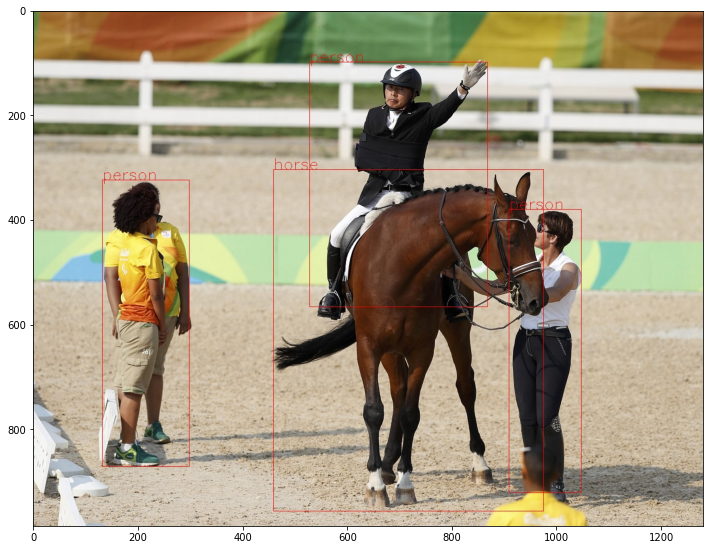

In [39]:

boxes = outputs["detection_boxes"][0]
labels = outputs["detection_classes"][0]
scores = outputs["detection_scores"][0]

output_image = cv.imread(img_path)
height, width = image.shape[1:3]

for box, label, score in zip(boxes, labels, scores):
    # スコアが 0.5 より大きいものだけ抽出
    if score <= 0.5:
        continue
    box = box * np.array([height, width, height, width])
    y_min, x_min, y_max, x_max = box.numpy().astype(int)

    #矩形を画像に表示
    cv.rectangle(output_image, (x_min, y_min), (x_max, y_max), color=(0, 0, 255))
    #カテゴリ名を画像にテキスト表示
    cv.putText(
   output_image,
   text=category[int(label)],
   org=(x_min, y_min),
   fontFace=cv.FONT_HERSHEY_SIMPLEX,
   fontScale=1,
   color=(0, 0, 255),
)
#画像を保存
cv.imwrite(output_name, output_image)

#画像を結果欄に表示
img = cv.imread(output_name)
show_img = cv.cvtColor(img, cv.COLOR_BGR2RGB) 
plt.rcParams["figure.figsize"] = (12, 12)
plt.imshow(show_img)